In [1]:
import data_util
import tree_util

1. Read Data: For this assignment, assume input is CSV and write a function that
can read a csv into python. It’s ok to use an existing function that already exists
in python or pandas.

By giving DTYPE_DICT (dictionary of data type for the columns), we can read csv file via read_csv_data function in data_util file

In [2]:
DTYPE_DICT = {'PersonID':str, 'SeriousDlqin2yrs':float, 'RevolvingUtilizationOfUnsecuredLines':float,
       'age':float, 'zipcode':str, 'NumberOfTime30-59DaysPastDueNotWorse':float, 'DebtRatio':float,
       'MonthlyIncome':float, 'NumberOfOpenCreditLinesAndLoans':float,
       'NumberOfTimes90DaysLate':float, 'NumberRealEstateLoansOrLines':float,
       'NumberOfTime60-89DaysPastDueNotWorse':float, 'NumberOfDependents':float}

In [3]:
data = data_util.read_csv_data(r"credit-data.csv", DTYPE_DICT)

The data contains 41016 rows and 13 columns

In [4]:
data.shape

(41016, 13)

The column will be re-ordered by COLUMN_ORDERED list, which will place the index, index of location in the beginning and classifier in the end.

In [5]:
COLUMN_ORDERED = ['PersonID', 'zipcode', 'age', 'RevolvingUtilizationOfUnsecuredLines', 
                  'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 
                  'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
                  'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 
                  'NumberOfDependents', 'SeriousDlqin2yrs']
classifier = 'SeriousDlqin2yrs'

2. Explore Data: You can use the code you wrote for assignment 1 here to generate
distributions of variables, correlations between them, find outliers, and data
summaries.

First of all we care about the missing data, the function summarize_missing_values in data_util file will provide summary information of missing value in each columns, we can observe that there is some but not problematic missing values in 'MonthlyIncome' and 'NumberOfDependents'.

In [6]:
data_util.summarize_missing_values(data)

{'DebtRatio': (0, 41016),
 'MonthlyIncome': (7974, 41016),
 'NumberOfDependents': (1037, 41016),
 'NumberOfOpenCreditLinesAndLoans': (0, 41016),
 'NumberOfTime30-59DaysPastDueNotWorse': (0, 41016),
 'NumberOfTime60-89DaysPastDueNotWorse': (0, 41016),
 'NumberOfTimes90DaysLate': (0, 41016),
 'NumberRealEstateLoansOrLines': (0, 41016),
 'PersonID': (0, 41016),
 'RevolvingUtilizationOfUnsecuredLines': (0, 41016),
 'SeriousDlqin2yrs': (0, 41016),
 'age': (0, 41016),
 'zipcode': (0, 41016)}

The function summarize_data_frame in data_util file provides summary information of the data

In [7]:
data_util.summarize_data_frame(data)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,0.161400,6.37587,51.683489,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,0.367904,221.61895,14.746880,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.03431,41.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.18973,51.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.66716,62.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,22000.00000,109.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


We can get the correlation matrix from the same function and used it in the plotting function plot_corr_metrix in data_util. We can than observe the relative strong correlation between 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse' which is reasonable because they are similar features with different condition on time. 

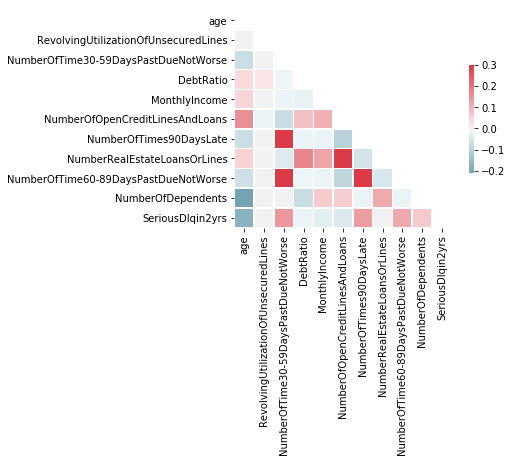

In [8]:
corr = data_util.summarize_data_frame(data, corr=True)[1]
data_util.plot_corr_metrix(corr)

In order to discover the distribution and outliers in the data, functions distribution_for_all_columns and plot_outlier_of_variable are provided in data_util file. By the plots provided belew, we can discovered that there are potential outliers in the variable "MonthlyIncome".

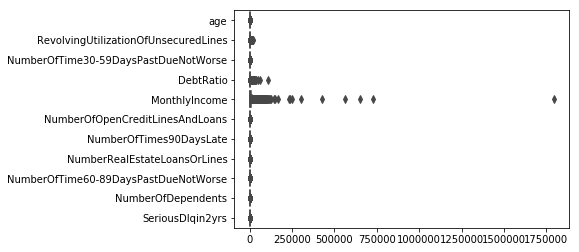

In [9]:
data_util.distribution_for_all_columns(data[COLUMN_ORDERED[2:]])

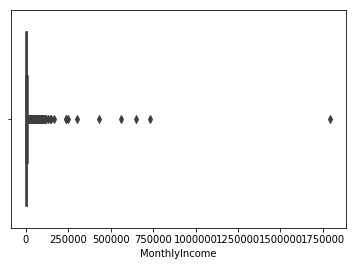

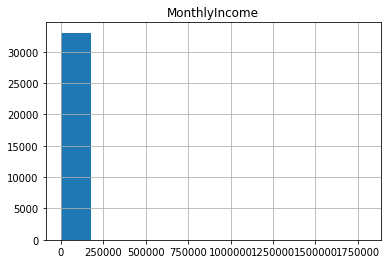

In [10]:
data_util.plot_outlier_of_variable(data,"MonthlyIncome")

We then drop the rows which have MonthlyIncome value larger than 90th percentile of MonthlyIncome, and the distribution becomes

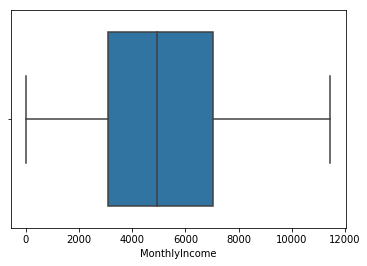

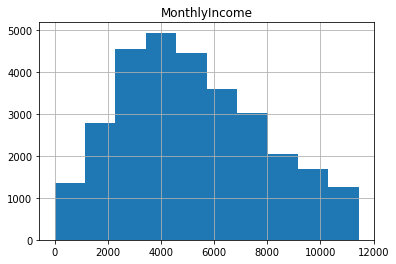

In [11]:
data = data[data["MonthlyIncome"] < data["MonthlyIncome"].quantile(0.9)]
data_util.plot_outlier_of_variable(data,"MonthlyIncome")

It's important to make sure the influence of the outliers is under controlled for the methods like decision tree. Outliers in continuous may potentially cause some problems in the process.

In order to compare means in variables grouped by different classifiers, function compare_mean is provided in the data_util file. We use age and MonthlyIncome as an example in this case. We discover that people with lower monthly income may have higher possibility to experience financial distress.

In [12]:
data_util.compare_means(data[["age","MonthlyIncome", classifier]], classifier)

{'SeriousDlqin2yrs==0.0':                 age  MonthlyIncome  SeriousDlqin2yrs
 count  24563.000000   24563.000000           24563.0
 mean      51.423157    5283.203070               0.0
 std       14.886455    2716.464011               0.0
 min       21.000000       0.000000               0.0
 25%       40.000000    3200.000000               0.0
 50%       51.000000    5000.000000               0.0
 75%       62.000000    7200.000000               0.0
 max       98.000000   11450.000000               0.0,
 'SeriousDlqin2yrs==1.0':                age  MonthlyIncome  SeriousDlqin2yrs
 count  5174.000000    5174.000000            5174.0
 mean     45.519521    4683.721685               1.0
 std      12.792471    2485.516008               0.0
 min      21.000000       0.000000               1.0
 25%      36.000000    2800.000000               1.0
 50%      45.000000    4238.000000               1.0
 75%      54.000000    6227.000000               1.0
 max      94.000000   11450.000000     

We can then visualize the information by using function depict_group in data_util file

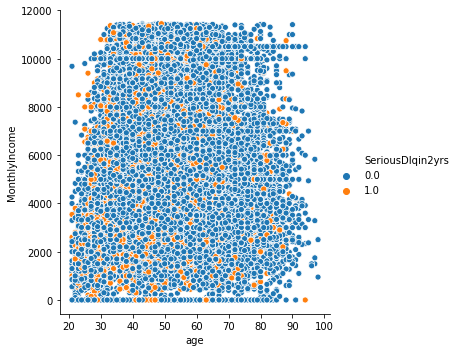

In [13]:
data_util.depict_group(data, "age", "MonthlyIncome", classifier)

However, by observing the visuzlized data, We cannot clearly observe the influence from MonthlyIncome to possibility of experiencing financial distress

3. Pre-Process Data: For this assignment, you can limit this to filling
in missing values for the variables that have missing values. You can use any
simple method to do it (use mean or median to fill in missing values).

By using fill_na function in data_util file, I fill the missing value in each columns with their respective column mean

In [14]:
data = data_util.fill_na(data)

We can depict pair-wise distribution with get_pair_distribution function in data_util file, we use 'age', 'DebtRatio', 'MonthlyIncome' for the example here.

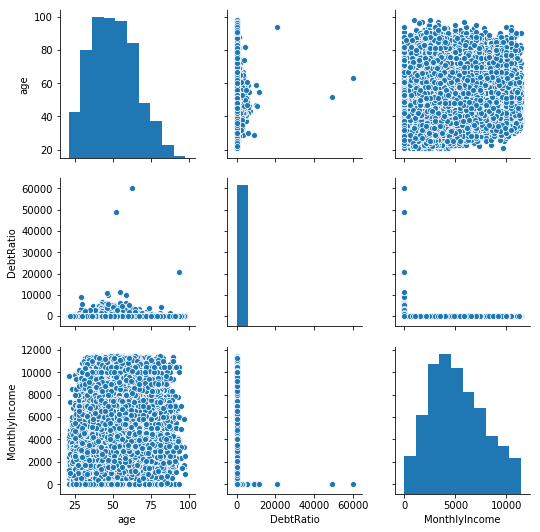

In [15]:
data_util.get_pair_distribution(data, ['age', 'DebtRatio', 'MonthlyIncome'])

4. Generate Features/Predictors: For this assignment, you should write one function
that can discretize a continuous variable and one function that can take a
categorical variable and create binary/dummy variables from it. Apply them to at
least one variable each in this data.

In practice, we may have to transform continuous variables to categorical variables and binary variables. The function continuous_to_category and category_to_binary will solve these tasks respectively. We use age for the example here.

In [16]:
AGE_INTERVAL = [21, 41, 51, 62, 109]
AGE_CATEGORIES = ["25per", "median", "75per", "max"]
data_age = data_util.continue_to_category(data, "age", AGE_INTERVAL, AGE_CATEGORIES)
data_age["age_category"].iloc[:10]

0      75per
2     median
3      75per
4     median
6     median
7      25per
8      25per
9        max
10    median
11     25per
Name: age_category, dtype: category
Categories (4, object): [25per < median < 75per < max]

In [17]:
data_binary = data_util.category_to_binary(data_age, "age_category")
data_binary.loc[:10, data_binary.columns[-5:]]

,age_category==75per,age_category==median,age_category==25per,age_category==max,age_category==nan
0,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,0,1,0
10,0,1,0,0,0


5. Build Classifier: For this assignment, select any classifier you feel comfortable with (Logistic Regression or Decision Trees)

We then move on to build classifier of decision tree. First of all, a decision tree could be trained with train_decision_tree function in tree_util file. We use all features as the first example

In [18]:
decision_tree, X_test, y_test = tree_util.train_decision_tree(data, COLUMN_ORDERED[2:-1], classifier, 0.1)

We can extract feature importances from function map_feature_importances in tree_util file, we can discover that 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'DebtRatio', and 'MonthlyIncome' have relatively high feature importances.

In [19]:
tree_util.map_feature_importances(decision_tree, COLUMN_ORDERED[2:-1])

{'DebtRatio': 0.15732048112390803,
 'MonthlyIncome': 0.14385990791371456,
 'NumberOfDependents': 0.034323518692793056,
 'NumberOfOpenCreditLinesAndLoans': 0.071128825018725153,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.050799529325567305,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.023675397341251146,
 'NumberOfTimes90DaysLate': 0.18020182429624057,
 'NumberRealEstateLoansOrLines': 0.025426765456567756,
 'RevolvingUtilizationOfUnsecuredLines': 0.20290661476977095,
 'age': 0.11035713606146125}

6. Evaluate Classifier: you can use any metric you choose for this assignment
(accuracy is the easiest one – we will not usually use accuracy but it’s fine for
this assignment). Feel free to evaluate it on the same data you built the model on
(this is not a good idea in general but for this assignment, it is fine). We haven't
covered models and evaluation yet, so don't worry about creating validation sets
or cross-validation.

We can evaluate the classifier by tree_prediction_evaluation function in tree_util file with helper functions accuracy_calculation and best_prediction_threshold (finding best cutoff of classification in probability) to provide accuracy of the prediction in whole testing data, testing data which is labeled 1 and test data which is labeled 0.

In [20]:
tree_util.tree_prediction_evaluation(decision_tree, X_test, y_test, 0.1, 0.05)[1:]

(0.796906523201076, 0.8755102040816326, 0.42938931297709926)

We can discover that the general accuracy (first number) is quite high, but if we decompose the accuracy we can discover that the method is good in predicting correct 0 (second number) but perform poorly in predicting correct 1 (third number) for the classifier. Accuracy is not a proper evaluation ,method to be used especially when the data is unbalanced, and the overfitting problem with feature selections is not solved.

In order to decide features we should include, function combination_indexer and get_var_combinations in data_util file can provide all possible combinations of features. We than use select_best_variables function in tree_util file to find the combination of features which has the highest overall accuracy

In [21]:
tree_util.select_best_variables(data, COLUMN_ORDERED[2:-1], classifier, 0.1, 0.1,\
                                     0.1, seed=1, target_accuracy_index=1)

(['age',
  'RevolvingUtilizationOfUnsecuredLines',
  'NumberOfTime30-59DaysPastDueNotWorse',
  'DebtRatio',
  'NumberOfTimes90DaysLate',
  'NumberOfTime60-89DaysPastDueNotWorse'],
 0.8076664425016813)

Considering the fact that the accuracy is not an appropriate method to evaluate the performance of decision tree, I will perform f1_score instead in the later assignments

Considering the possibility that data might be imbalance between cases which is labelled 0 and cases which is labelled 1, a function reset_balance is provided to restructure the data. By balancing the size of two group (cls0_size : cls1_size) and multiple times of sampling, this method is able to provide robust check for decision tree method

In [22]:
type(tree_util.reset_balance(data, classifier, 5, cls0_size=2, cls1_size=1)[0])

pandas.core.frame.DataFrame

The tree can be depicted by function depict_decision_tree function in tree_util file and save as pdf file

In [23]:
decision_tree_pict, X_test, y_test = tree_util.train_decision_tree(data, ['age'], classifier, 0.1)
tree_util.depict_decision_tree(decision_tree_pict, ['age'] , classifier, "tree.pdf")

Reference:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

https://scikit-learn.org/stable/modules/tree.html

https://seaborn.pydata.org/index.html